**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import sklearn

**Data Preprocessing**

In [2]:
dataset = pd.read_csv('diabetes_prediction_dataset.csv')
# dataset

In [3]:
X = dataset.iloc[:, 0:-1].values
Y = dataset.iloc[:, -1].values

In [4]:
pd.DataFrame(X, columns = ["gender", "age", "hypertension","heart_disease","smoking_history","bmi","HbA1c_level","blood_glucose_level"])

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,Female,80.0,0,1,never,25.19,6.6,140
1,Female,54.0,0,0,No Info,27.32,6.6,80
2,Male,28.0,0,0,never,27.32,5.7,158
3,Female,36.0,0,0,current,23.45,5.0,155
4,Male,76.0,1,1,current,20.14,4.8,155
...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90
99996,Female,2.0,0,0,No Info,17.37,6.5,100
99997,Male,66.0,0,0,former,27.83,5.7,155
99998,Female,24.0,0,0,never,35.42,4.0,100


In [5]:
pd.DataFrame(Y, columns = ["diabetes"])

,diabetes
0,0
1,0
2,0
3,0
4,0
...,...
99995,0
99996,0
99997,0
99998,0


In [6]:
# X

In [7]:
# Y

**Data Encoding**

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 0] = le.fit_transform(X[:, 0])
# print(X)

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [4])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [10]:
# print(X)

**Splitting Data into Training & Test Set**

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

**Feature Scaling**

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**ANN Construction**

In [76]:
# ANN Initialization
ann = tf.keras.models.Sequential()

ann.add(tf.keras.layers.Dense(units=10, activation='elu'))       # Input Layer and 1st Hidden Layer (Activation Function: eLU)
ann.add(tf.keras.layers.Dense(units=10, activation='selu'))       # Second Hidden layer (AF: SeLU)
ann.add(tf.keras.layers.Dense(units=10, activation='gelu'))       # Second Hidden layer (AF: GeLU)
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))    # Output layer (AF: Sigmoid)


**ANN Training**

In [77]:
# ANN Compilation (Optimizer: ADAMax, Loss Function: Binary Cross-Entropy)
ann.compile(optimizer = 'adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

# ANN Training (Batch Size: 32, Epochs: 100)
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
2500/2500 [==============================] - 2s 682us/step - loss: 0.1726 - accuracy: 0.9431
Epoch 2/100
2500/2500 [==============================] - 2s 677us/step - loss: 0.1171 - accuracy: 0.9588
Epoch 3/100
2500/2500 [==============================] - 2s 675us/step - loss: 0.1146 - accuracy: 0.9596
Epoch 4/100
2500/2500 [==============================] - 2s 682us/step - loss: 0.1134 - accuracy: 0.9599
Epoch 5/100
2500/2500 [==============================] - 2s 693us/step - loss: 0.1128 - accuracy: 0.9603
Epoch 6/100
2500/2500 [==============================] - 2s 704us/step - loss: 0.1123 - accuracy: 0.9606
Epoch 7/100
2500/2500 [==============================] - 2s 700us/step - loss: 0.1120 - accuracy: 0.9608
Epoch 8/100
2500/2500 [==============================] - 2s 682us/step - loss: 0.1115 - accuracy: 0.9610
Epoch 9/100
2500/2500 [==============================] - 2s 697us/step - loss: 0.1110 - accuracy: 0.9609
Epoch 10/100
2500/2500 [==============================]

**Model Evaluation & Prediction Making**

In [78]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

625/625 [==============================] - 0s 521us/step
[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


**Confusion Matrix**

In [79]:
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Model Performance Metrics
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("Model Specificity:", tn / (tn+fp))
print("Model Specificity:", tp / (tp+fn))

Model Accuracy: 0.97125
Model Specificity: 0.9985243482538121
Model Specificity: 0.6782149148561363


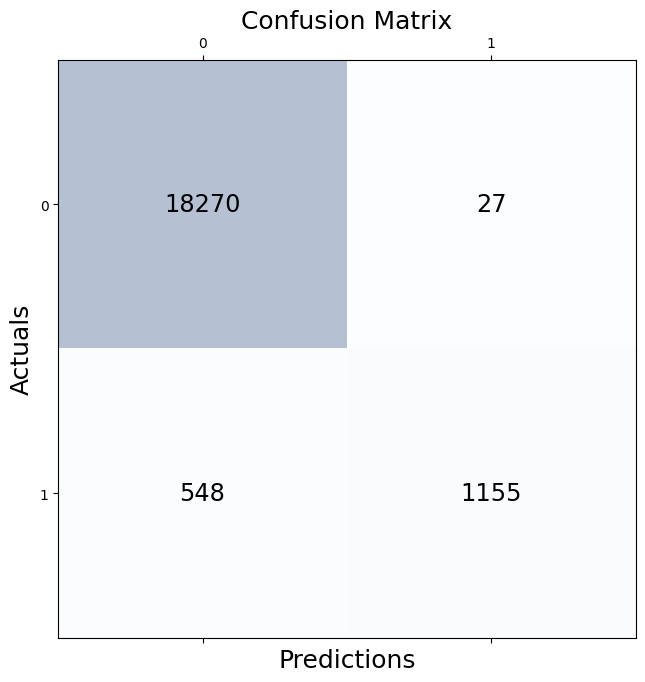

In [80]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()